<a href="https://colab.research.google.com/github/wasimkhan33/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [918]:
# Import key Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('precision', 2) #sets the output display precision in terms of decimal places
sns.set_style('whitegrid')

In [919]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [920]:
data1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Capstone 4/Copy of Online Retail.xlsx')

df = data1.copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#Data exploring and preprocessing

In [921]:
df.shape

(541909, 8)

In [922]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Our dataset is composed of 8 columns and 541,909 rows. Let's explore the different columns and then check for null values and decide how we want to deal with them.

**Check for Null Values**

In [923]:
df.isnull().values.any()

True

In [924]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [925]:
print("Percentage of customers missing: ", round(df['CustomerID'].isnull().sum() * 100 / len(df),2),"%" )

Percentage of customers missing:  24.93 %


In [926]:
print("Percentage of Description missing: ", round(df['Description'].isnull().sum() * 100 / len(df),2),"%" )

Percentage of Description missing:  0.27 %


In [927]:
# Identify the number of NAs in each feature and select only those having NAs
total_NA = df.isnull().sum()[df.isnull().sum() != 0]

# Calculate the percentage of NA in each feature
percent_NA = df.isnull().sum()[df.isnull().sum() != 0]/df.shape[0]

# Summarize our findings in a dataframe
missing = pd.concat([total_NA, percent_NA], axis=1, keys=['Total NAs', 'Percentage']).sort_values('Total NAs', ascending=False)
missing

,Total NAs,Percentage
CustomerID,135080,2.49e-01
Description,1454,2.68e-03


In [928]:
print('Number of duplicated records: ', df.duplicated(keep='first').sum())


Number of duplicated records:  5268


a. We are missing values in the CustomerID and Description columns.
<br>
b. Since 25% of the customer ID's are missing, we will create and fill a new column that has a 1 when customer ID is null and a 0 when it is not.
<br>
c. We will investigate the records where the CustomerID field is null to determine whether to erase those rows or fill in the missing values.
<br>
d. Since we won't be doing analysis on the descriptions of the orders, we can leave the null values as it is for now.

In [929]:
df['CustomerID_is_null'] = [1 if i == True else 0 for i in df.CustomerID.isnull()]

In [930]:
#Create a new dateframe of only orders with missing CustomerID values
df1 = df[df['CustomerID_is_null'] == 1]

In [931]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135080 entries, 622 to 541540
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           135080 non-null  object        
 1   StockCode           135080 non-null  object        
 2   Description         133626 non-null  object        
 3   Quantity            135080 non-null  int64         
 4   InvoiceDate         135080 non-null  datetime64[ns]
 5   UnitPrice           135080 non-null  float64       
 6   CustomerID          0 non-null       float64       
 7   Country             135080 non-null  object        
 8   CustomerID_is_null  135080 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 10.3+ MB


In [932]:
df1.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,1
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,1
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,1
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,1
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,1
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom,1
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,1
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom,1
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom,1
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom,1


I noticed that there are usually several products being bought per order where each unique **InvoiceNo** is a sperate order.


In [933]:
print("Number of orders in df1:", df1['InvoiceNo'].nunique())
print("Avg. number of products per order in df1: ", round(df1['StockCode'].count() / df1['InvoiceNo'].nunique(),2) )
print("Avg. number of products per order in df: ",  round(df['StockCode'].count() / df['InvoiceNo'].nunique(),2) )

Number of orders in df1: 3710
Avg. number of products per order in df1:  36.41
Avg. number of products per order in df:  20.92


Since the customer ID's are missing, lets assume these orders were not made by the customers already in the data set because those customers already have ID's. We also don't want to assign these orders to those customers because this would alter the insights we draw from the data. Instead of dropping the null **CustomerID** values, let's assign those rows a unique customer ID per order. This will act as a new customer for each unique order. 
<br>
<br>
**How should we assign the new customer ID's?**
<br>
<br>
Using the values in the **InvoiceNo** column would be the most straightfoward approach. We will create a new customer ID column called **NewID** with the invoice numbers filling in for the missing values. Then we will add the number of unique orders in df1 and to number of unique values in **CustomerID** and see if it equals the number of unique values in **NewID**. This will check if any of the new values match the existing values in the column and make sure we didn't add more orders to an existing customer.

In [934]:
df['NewID'] = df['CustomerID']
df.loc[df['CustomerID_is_null'] == 1, ['NewID']] = df['InvoiceNo']

#drop CustomerID column since it isn't need anymore
# df = df.drop('CustomerID', 1)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,1.8e+04
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,1.8e+04
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,1.8e+04
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,1.8e+04
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,1.8e+04


Notice that **NewID** doesn't have any missing values, but the column includes object data types. As mentioned in the description of the dataset, if the invoice number starts with the letter "C", it means it the order was cancelled. All of the data types in the new customer ID column need to be numeric, so we need to first remove any "C" characters from the column.

In [935]:
#Remove all non digits from column NewID
df['NewID'] = df['NewID'].astype(str).str.replace('\D+', '')

#Convert to integer
df['NewID'] = pd.to_numeric(df['NewID'])

#Check if the 'C' character was removed in the NewID column
df[df['NewID']== 580605]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom,1,580605


In [936]:
Num_CustomerID = df['CustomerID'].nunique()
Num_df1_InvoiceNo = df1['InvoiceNo'].nunique()
Num_NewID = df['NewID'].nunique()
print("Number of Customers:", df['CustomerID'].nunique())
print("Number of Orders in df1:", df1['InvoiceNo'].nunique())
print("Number of Customers + Number of Orders in df1:", Num_CustomerID + Num_df1_InvoiceNo)
print("Number of New ID's:", df['NewID'].nunique())

Number of Customers: 4372
Number of Orders in df1: 3710
Number of Customers + Number of Orders in df1: 8082
Number of New ID's: 8082


Since both values equal 8082, we know all the different orders that didn't have a customer ID got assigned unique NewID.

In [937]:
# df.dropna(axis=0, subset=['CustomerID'], inplace= True)

# 2. Exploratory Data Analysis

Now that our data set is clean, let's take a closer look at the numberic columns, specifically Quantity and UnitPrice.

In [938]:
df.describe()

,Quantity,UnitPrice,CustomerID,CustomerID_is_null,NewID
count,541909.00,541909.00,406829.00,541909.00,541909.00
mean,9.55,4.61,15287.69,0.25,253869.47
std,218.08,96.76,1713.60,0.43,176036.80
min,-80995.00,-11062.06,12346.00,0.00,123460.00
25%,1.00,1.25,13953.00,0.00,143670.00
50%,3.00,2.08,15152.00,0.00,162490.00
75%,10.00,4.13,16791.00,0.00,182830.00
max,80995.00,38970.00,18287.00,1.00,581498.00


Notice that there are negative values in the Quantity and UnitPrice columns. I am assuming these are orders that were cancelled and items that were returned, but lets make sure.

## Negative Values

As mentioned above, if the invoice number starts with the letter "C", it means it the order was cancelled.

In [939]:
cancelled_orders = df[df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,0,145270
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,0,153110
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,0,175480
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0,175480
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0,175480


In [940]:
cancelled_orders[cancelled_orders['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID


Since nothing came back when we filtered the cancelled orders by Quantity > 0, this confirms that the negative values mean the order was cancelled.

**How many orders were cancelled?**

In [941]:
print("There were", len(cancelled_orders), "cancelled orders.")

#Calculate the percentage of cancellations by dividing the cancelled orders by the total orders
total_orders = df['InvoiceNo'].nunique()
number_cancelled = len(cancelled_orders)
print('Percentage of orders cancelled: {:.2f}% '.format(number_cancelled / total_orders * 100))

There were 9288 cancelled orders.
Percentage of orders cancelled: 35.86% 


9288 or about 36% of the orders were cancelled. Looking deeper into why these orders were cancelled may prevent future cancellations.

 Now let's find out what a negative UnitPrice means.

In [942]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,1,563186
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,1,563187


The description of "Adjust bad debt" tells us that this is an adjustment for a customer with insufficient funds or an allowance for a customer who never paid for the order.

## Exploring the Orders

#### a. What's the average number of orders per customer?

In [943]:
#Find the unique number of InvoiceNo  per customer
groupby_customers = pd.DataFrame(df.groupby('NewID')['InvoiceNo'].nunique())
groupby_customers.head()

,InvoiceNo
NewID,
123460,2
123470,7
123480,4
123490,1
123500,1


In [944]:
groupby_customers.describe()

,InvoiceNo
count,8082.00
mean,3.20
std,7.16
min,1.00
25%,1.00
50%,1.00
75%,3.00
max,248.00


The average number of orders per customer is 3.
<br>
<br>
We found in descriptive statistics above that customers buy an average quantity of about 10 per product. Are there some products that are extremely popular? What's the distribution of the number of items the customers buy?

#### b. What's the average number of unqiue items per order and per customer?

In [945]:
groupby_invoice = pd.DataFrame(df.groupby('InvoiceNo')['StockCode'].nunique())
groupby_invoice.columns = ['Number of Items per Order']
groupby_invoice.head()

,Number of Items per Order
InvoiceNo,
536365,7
536366,2
536367,12
536368,4
536369,1


In [946]:
groupby_invoice.describe()

,Number of Items per Order
count,25900.00
mean,20.51
std,42.50
min,1.00
25%,2.00
50%,10.00
75%,23.00
max,1110.00


Let's see how this compares to the number of unique products per customer.

In [947]:
groupby_ID = pd.DataFrame(df.groupby('NewID')['StockCode'].nunique())
groupby_ID.columns = ['Number of Items per Customer']
groupby_ID.head()

,Number of Items per Customer
NewID,
123460,1
123470,103
123480,22
123490,73
123500,17


In [948]:
groupby_ID.describe()

,Number of Items per Customer
count,8082.00
mean,49.76
std,91.22
min,1.00
25%,1.00
50%,17.00
75%,58.00
max,1794.00


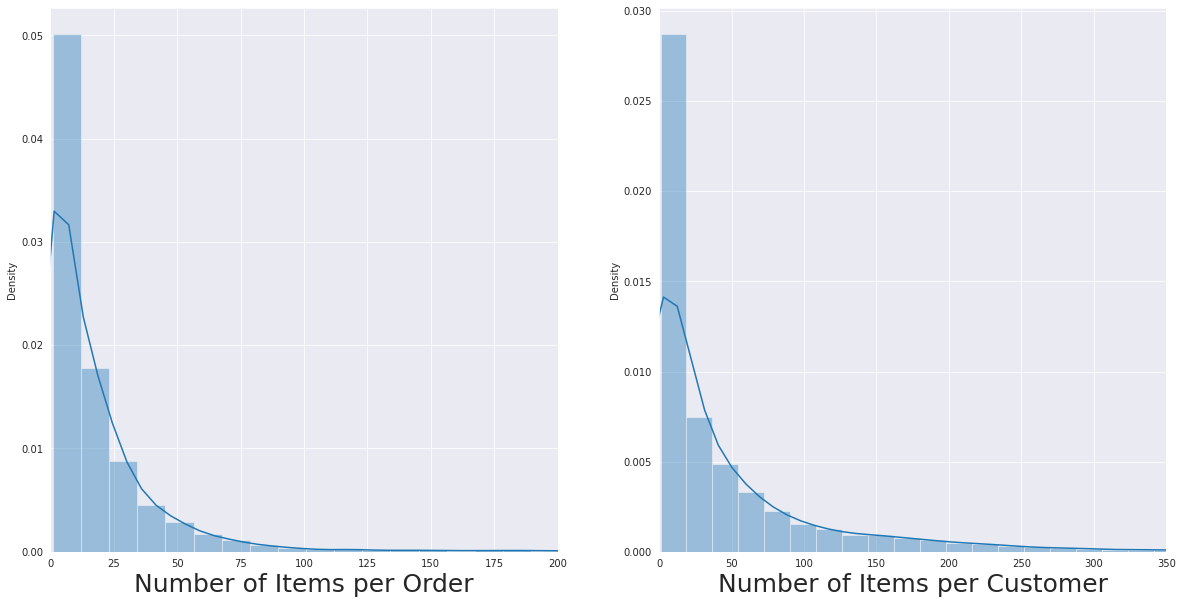

In [949]:
#Visualize the distribution of both
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20, 10)
plt1 = sns.distplot(groupby_invoice['Number of Items per Order'], ax=ax[0], bins=100)
plt1.set_xlim(0,200)
plt1.set_xlabel(xlabel='Number of Items per Order',fontsize=25)
plt2 = sns.distplot(groupby_ID['Number of Items per Customer'], ax=ax[1], bins=100)
plt2.set_xlim(0,350)
plt2.set_xlabel(xlabel='Number of Items per Customer',fontsize=25)
plt.show()

We have skewed left distributions for both plots. The average number of items per order is 20.5 and the average number of items per customer is 50.

## Customers by Country

In [950]:
df['Total_Cost'] = df['Quantity'] * df['UnitPrice']

In [951]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerID_is_null,NewID,Total_Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,178500,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,178500,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,178500,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,178500,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,178500,20.34


** What's the total revenue per country? **

Let's look at the number of customers by country to get an idea of which countries have the most orders.

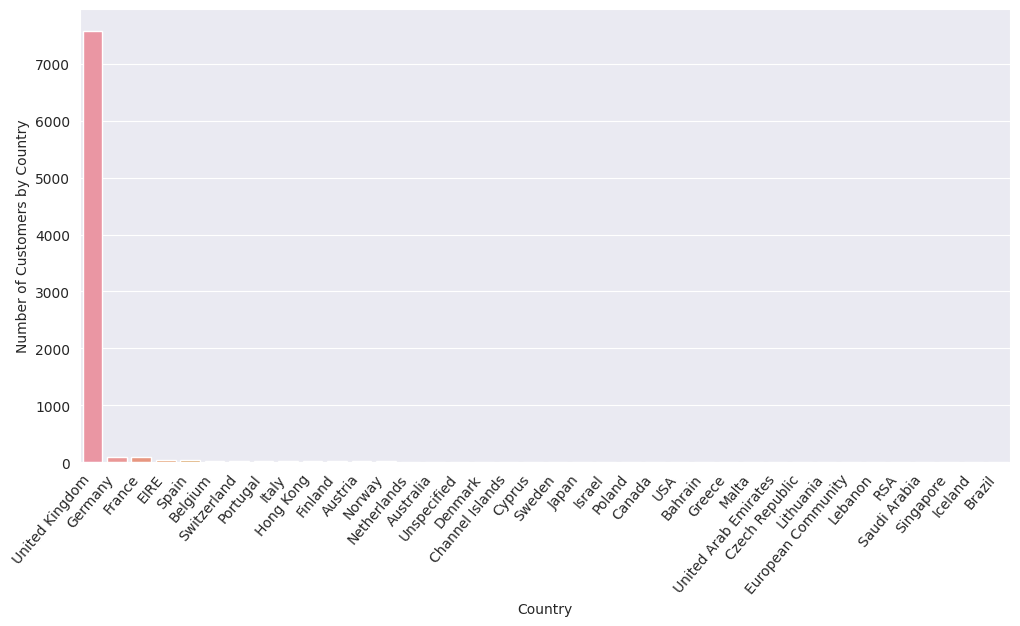

In [952]:
country_df = pd.DataFrame(df.groupby('Country')['NewID'].nunique())
country_df.columns = ['Number of Customers by Country']
country_df.sort_values('Number of Customers by Country', inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(12,6),dpi=100)
ax=sns.barplot(x=country_df.index, y=country_df['Number of Customers by Country'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.show()

The United Kingdom has significantly more customers than the other countries in our data set, so their total cost should look similar.

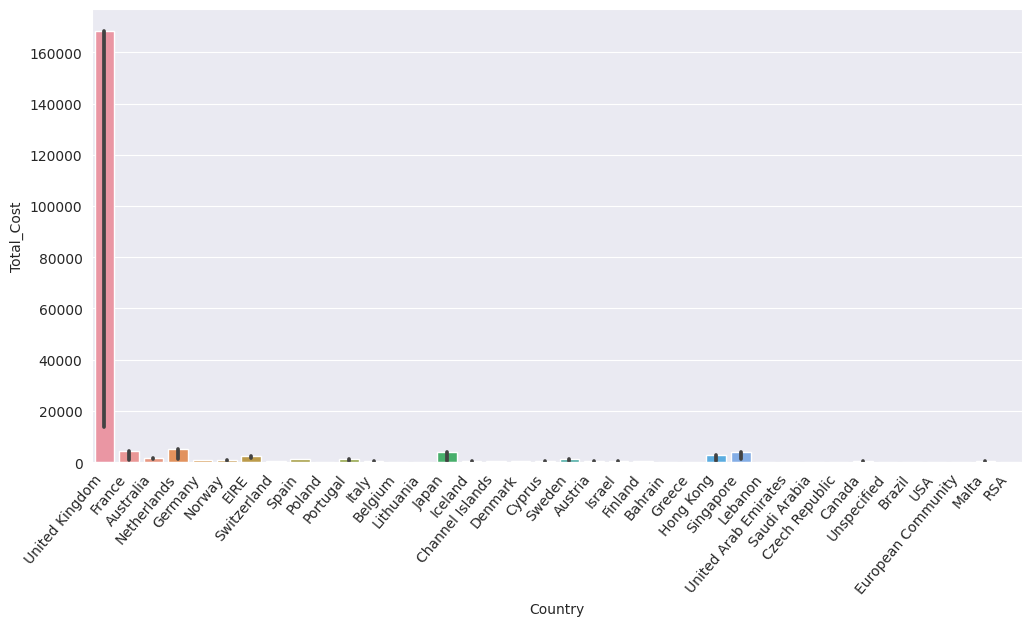

In [953]:
fig1, ax1 = plt.subplots(figsize=(12,6),dpi=100)
ax1=sns.barplot(x='Country', y='Total_Cost', data=df, estimator=max, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=50, ha="right")
plt.show()

The UK not only has the most sales revenue, but also the most customers. Since the majority of this data set contains orders from the UK, we can explore the UK market further by finding out what products the customers buy together and any other buying behaviors to improve our sales and targeting strategy.

## Exploring the UK Market

In [954]:
df_uk = df[df['Country']=='United Kingdom']
df_uk.describe()

,Quantity,UnitPrice,CustomerID,CustomerID_is_null,NewID,Total_Cost
count,495478.00,495478.00,361878.00,495478.00,495478.00,495478.00
mean,8.61,4.53,15547.87,0.27,264016.67,16.53
std,227.59,99.32,1594.40,0.44,179302.72,394.84
min,-80995.00,-11062.06,12346.00,0.00,123460.00,-168469.60
25%,1.00,1.25,14194.00,0.00,146390.00,3.29
50%,3.00,2.10,15514.00,0.00,166390.00,8.29
75%,10.00,4.13,16931.00,1.00,538566.00,16.63
max,80995.00,38970.00,18287.00,1.00,581498.00,168469.60


In [955]:
print("Percentage of customers from the UK: ", round(df_uk['NewID'].nunique() * 100 / df['NewID'].nunique(),2),"%" )
print("Number of transactions: ", df_uk['InvoiceNo'].nunique())
print("Number of products Bought: ", df_uk['StockCode'].nunique())
print("Number of customers:", df_uk['NewID'].nunique())

Percentage of customers from the UK:  93.88 %
Number of transactions:  23494
Number of products Bought:  4065
Number of customers: 7587


**What are the most popular products that are bought in the UK?**

In [956]:
uk_product = df_uk.groupby(['StockCode','Description'],as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
uk_product.head(10)

,StockCode,Description,Quantity
3154,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48326
4340,85099B,JUMBO BAG RED RETROSPOT,43167
1237,22197,POPCORN HOLDER,34365
3274,84879,ASSORTED COLOUR BIRD ORNAMENT,33679
4353,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32901
1677,22616,PACK OF 12 LONDON TISSUES,25307
437,21212,PACK OF 72 RETROSPOT CAKE CASES,24702
1216,22178,VICTORIAN GLASS HANGING T-LIGHT,23242
41,17003,BROCADE RING PURSE,22801
11,15036,ASSORTED COLOURS SILK FAN,20322


We will continue analyzing the UK transactions with customer segmentation.

**Data Cleaning**

In [957]:
df.select_dtypes(include= ['int64', 'float64']).describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.55,218.08,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.61,96.76,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.69,1713.60,12346.00,13953.00,15152.00,16791.00,18287.0
CustomerID_is_null,541909.0,0.25,0.43,0.00,0.00,0.00,0.00,1.0
NewID,541909.0,253869.47,176036.80,123460.00,143670.00,162490.00,182830.00,581498.0
Total_Cost,541909.0,17.99,378.81,-168469.60,3.40,9.75,17.40,168469.6


In [958]:
# No more need of newly created explored column
df = df.drop(columns=['CustomerID_is_null','NewID'], axis=1)

In [959]:
# drop rows with NaN
df.dropna(axis=0, subset=['CustomerID'], inplace= True)

In [960]:
df[['StockCode']] = df['StockCode'].astype(str)
df[['CustomerID']] = df['CustomerID'].astype(int).astype(str)

- Assert that StockCode and Customer ID are of string data type not integers or floats.


Drop duplicated records.

In [961]:
# Drop duplicated records.
indx = df[df.duplicated(keep='first')].index
df.drop(index = indx, inplace= True)

In [962]:
df.dtypes.value_counts()


object            5
float64           2
datetime64[ns]    1
int64             1
dtype: int64

- Number of different data types in the dataset.

Transactions with a letter 'C' at the beginning of its invoice numbers are canceled transactions, so we drop them.


In [963]:
# Drop cancelled transactions
indx = df.InvoiceNo[df.InvoiceNo.str.contains('C') == True].index
df.drop(index= indx, inplace= True)

Some transaction have a sale price of zero, these could be free gifts for some customers and not true sales transaction. So, we will drop them.

In [964]:
# Drop transactions with price zero
indx = df.loc[df.UnitPrice == 0].index
df.drop(index= indx, inplace= True)

In [965]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  object        
 7   Country      392692 non-null  object        
 8   Total_Cost   392692 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.0+ MB


#Feature Engineering

Building features for RFM model

In [966]:
# FEATURE ENGINEERING 
# ADDING A COLUMN TO THE DATASET

# sales = unitprice*quantity

In [967]:
# Amount per transaction which is the product of sale price and quantity
# df['Amount'] = df['Price'] * df['Quantity']
df['Total_Cost'] = df['Quantity'] * df['UnitPrice']

Separate transaction time (in hours) from transaction date.

Link - https://stackoverflow.com/questions/45304531/extracting-the-first-day-of-month-of-a-datetime-type-column-in-pandas

In [968]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [969]:
# Create new variable for Invoice time in hours
df['Transaction_time'] = df['InvoiceDate'].dt.hour

# Create new variable for Invoice date
df['Transaction_date'] = df['InvoiceDate'].dt.date
df['Transaction_date'] = df.Transaction_date.apply(lambda x: x.replace(day = 1))

In [970]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Cost,Transaction_time,Transaction_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,8,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,8,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,2010-12-01


For each transaction, calculate the number of months since transaction date to the end of the year (Dec 2010).


In [971]:
from dateutil.relativedelta import relativedelta

In [972]:
# calculate the no. of months since transaction date .
ref = datetime.strptime('2011-12', '%Y-%m')
df['Mnths_since_purchase'] = df.Transaction_date.apply(lambda x: \
                                        relativedelta(ref,x).years*12 + relativedelta(ref,x).months)
Recency = df.groupby('CustomerID').agg({'Mnths_since_purchase' : 'min'}).copy().rename(columns= {'Mnths_since_purchase':'Recency'})

For each customer, calculate the number of months since his/her first purchase.

In [973]:
# Calculate the number of months since the first purchase for each customer
df['First_purchase'] = df['Mnths_since_purchase'].copy()
First_purchase = df.groupby('CustomerID').agg({'First_purchase' : 'max'}).copy().rename(columns= {'Mnths_since_purchase':'First_purchase'})

In [974]:
Frequency = df.groupby(['CustomerID',
                    'Transaction_date']).agg({'InvoiceNo' : 'nunique'}).groupby(['CustomerID']).agg({'InvoiceNo' : 'mean'}).copy().rename(columns= {'InvoiceNo':'Frequency'})

In [975]:
Monetary_value = df.groupby(['CustomerID',
                    'InvoiceNo']).agg({'Total_Cost' : 'sum'}).groupby(['CustomerID']).agg({'Total_Cost' : 'mean'}).copy().rename(columns= {'InvoiceNo':'Frequency',
                                                              'Total_Cost': 'Monetary_value'})

In [976]:
# Calculate Average number of unique items in each transaction for each customer
unique_items = df.groupby(['CustomerID', 'InvoiceNo']).agg({'StockCode': 'nunique'}).groupby(['CustomerID']\
            ).agg({'StockCode':'mean'}).rename(columns={'StockCode': 'Unique_items'})

Assemble all new features into a new data frame to be used for model training later.


In [977]:
# Create transformed data for Clustering
data_transformed = pd.concat([Recency, First_purchase, Frequency, Monetary_value,unique_items], axis=1)
data_transformed.describe()

,Recency,First_purchase,Frequency,Monetary_value,Unique_items
count,4338.00,4338.00,4338.00,4338.00,4338.00
mean,3.22,7.48,1.23,417.65,21.51
std,3.28,3.82,0.77,1796.51,19.08
min,0.00,0.00,1.00,3.45,1.00
25%,1.00,4.00,1.00,177.87,9.38
50%,2.00,8.00,1.00,291.94,16.84
75%,5.00,11.00,1.25,428.28,27.64
max,12.00,12.00,34.00,84236.25,298.82


- Plot the distribution for all variables to detect potential outliers and decide whether normalization is needed.


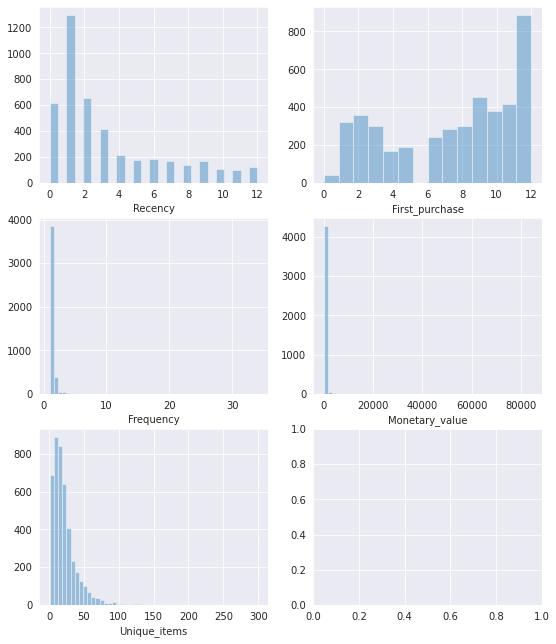

In [978]:
# Plot the distribution of all variables that will be used for model training
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(9,11))
sns.distplot(data_transformed.Recency, ax= ax[0][0], kde= False)
sns.distplot(data_transformed.First_purchase, ax= ax[0][1], kde= False)
sns.distplot(data_transformed.Frequency, ax= ax[1][0], kde= False)
sns.distplot(data_transformed.Monetary_value, ax= ax[1][1], kde= False)
sns.distplot(data_transformed.Unique_items, ax= ax[2][0], kde= False)

The plots show some potential outliers in both frequency and Monetary value, so we will drop those customers from our dataset. Such that customers having more than Mean + 3 Std (i.e. Z-score > 3). will be dropped.

In [979]:
# Define frequency threshold value and drop customers who exceed the threshold
freq_stats = data_transformed['Frequency'].describe()
freq_threshold = freq_stats['mean'] + 3 * freq_stats['std'] #freq_threshold=3.7581864236322606
indx = data_transformed.loc[data_transformed.Frequency > freq_threshold].index
data_transformed.drop(index = indx, inplace= True)

In [980]:
# Define Monetary value threshold value and drop customers who exceed the threshold
m_stats = data_transformed['Monetary_value'].describe()
m_threshold = m_stats['mean'] + 3 * m_stats['std']
indx = data_transformed.loc[data_transformed.Monetary_value > m_threshold].index
data_transformed.drop(index = indx, inplace= True)

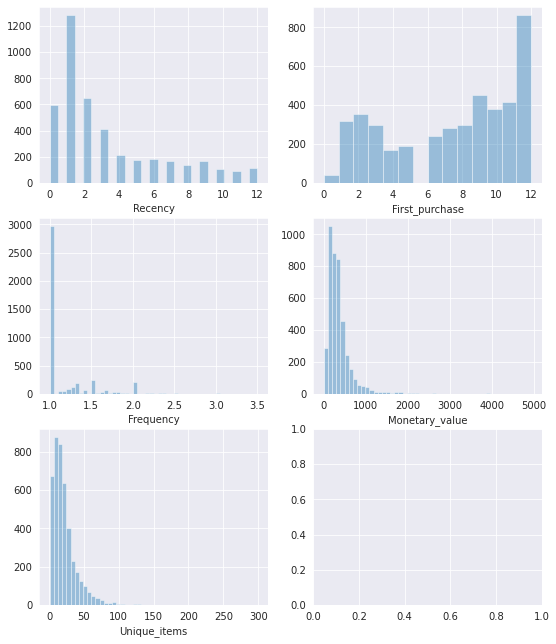

In [981]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(9,11))
sns.distplot(data_transformed.Recency, ax= ax[0][0], kde= False)
sns.distplot(data_transformed.First_purchase, ax= ax[0][1], kde= False)
sns.distplot(data_transformed.Frequency, ax= ax[1][0], kde= False)
sns.distplot(data_transformed.Monetary_value, ax= ax[1][1], kde= False)
sns.distplot(data_transformed.Unique_items, ax= ax[2][0], kde= False)

- Plots show that variables have very different scales and some of them are heavily skewed. So we will normalize all variables.

In [982]:
import sklearn.preprocessing as pp

In [983]:
# Normalize the four variables
scaler = pp.StandardScaler()
data_transformed_scaled = pd.DataFrame(scaler.fit_transform(data_transformed),columns= data_transformed.columns)

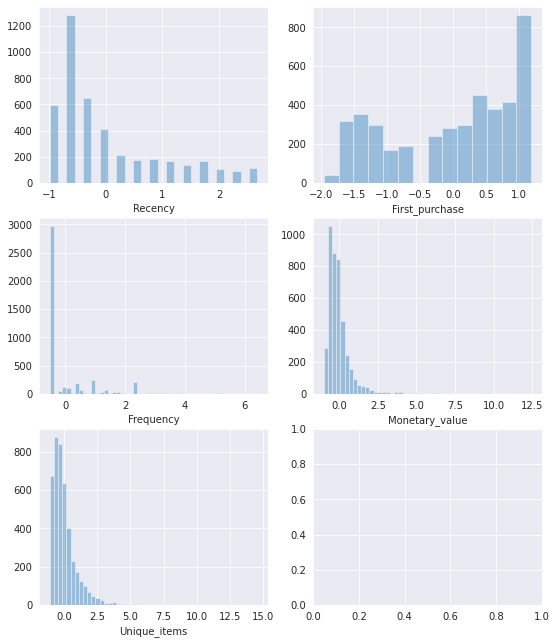

In [984]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(9,11))
sns.distplot(data_transformed_scaled.Recency, ax= ax[0][0], kde= False)
sns.distplot(data_transformed_scaled.First_purchase, ax= ax[0][1], kde= False)
sns.distplot(data_transformed_scaled.Frequency, ax= ax[1][0], kde= False)
sns.distplot(data_transformed_scaled.Monetary_value, ax= ax[1][1], kde= False)
sns.distplot(data_transformed_scaled.Unique_items, ax= ax[2][0], kde= False)